In [0]:
import pandas as pd
import itertools

from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, BatchNormalization, MaxPool2D
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.optimizers import RMSprop
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [0]:
!pip install tensorflow==1.12.0
import tensorflow as tf
print(tf.__version__)

In [0]:
f_df = pd.read_csv('finally_dataframe.csv')

In [3]:
f = f_df.iloc[:,1:]
f

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,Action
0,93.0,105.0,115.0,122.0,129.0,133.0,134.0,135.0,134.0,133.0,135.0,134.0,134.0,136.0,138.0,137.0,138.0,138.0,135.0,132.0,127.0,122.0,109.0,95.0,104.0,116.0,125.0,132.0,138.0,142.0,142.0,141.0,140.0,139.0,141.0,140.0,141.0,143.0,144.0,143.0,...,47.0,51.0,66.0,47.0,52.0,79.0,80.0,80.0,79.0,77.0,74.0,69.0,63.0,57.0,52.0,63.0,71.0,78.0,82.0,84.0,85.0,88.0,88.0,89.0,88.0,88.0,88.0,88.0,89.0,89.0,91.0,91.0,90.0,89.0,86.0,82.0,77.0,69.0,60.0,4
1,93.0,105.0,115.0,122.0,129.0,133.0,134.0,135.0,134.0,133.0,135.0,134.0,134.0,136.0,138.0,137.0,138.0,138.0,135.0,132.0,127.0,122.0,109.0,95.0,104.0,116.0,125.0,132.0,138.0,142.0,142.0,141.0,140.0,139.0,141.0,140.0,141.0,143.0,144.0,143.0,...,47.0,51.0,66.0,47.0,52.0,79.0,80.0,80.0,79.0,77.0,74.0,69.0,63.0,57.0,52.0,63.0,71.0,78.0,82.0,84.0,85.0,88.0,88.0,89.0,88.0,88.0,88.0,88.0,89.0,89.0,91.0,91.0,90.0,89.0,86.0,82.0,77.0,69.0,60.0,4
2,93.0,105.0,115.0,122.0,129.0,133.0,134.0,135.0,134.0,133.0,135.0,134.0,134.0,136.0,138.0,137.0,138.0,138.0,135.0,132.0,127.0,122.0,109.0,95.0,104.0,116.0,125.0,132.0,138.0,142.0,142.0,141.0,140.0,139.0,141.0,140.0,141.0,143.0,144.0,143.0,...,48.0,54.0,69.0,47.0,52.0,79.0,80.0,80.0,79.0,78.0,74.0,70.0,64.0,58.0,52.0,63.0,71.0,78.0,82.0,84.0,86.0,88.0,88.0,89.0,88.0,88.0,88.0,88.0,89.0,90.0,91.0,92.0,91.0,89.0,86.0,82.0,77.0,69.0,61.0,4
3,92.0,104.0,114.0,122.0,128.0,133.0,134.0,135.0,134.0,133.0,135.0,135.0,134.0,136.0,138.0,138.0,138.0,138.0,135.0,132.0,128.0,122.0,108.0,95.0,103.0,115.0,125.0,132.0,138.0,142.0,142.0,142.0,141.0,139.0,141.0,140.0,141.0,143.0,144.0,143.0,...,49.0,52.0,68.0,48.0,52.0,79.0,80.0,81.0,79.0,78.0,74.0,70.0,64.0,58.0,53.0,63.0,71.0,78.0,82.0,85.0,86.0,88.0,88.0,89.0,89.0,88.0,89.0,89.0,90.0,90.0,92.0,92.0,91.0,90.0,86.0,82.0,77.0,70.0,61.0,4
4,92.0,104.0,115.0,123.0,129.0,134.0,134.0,134.0,134.0,133.0,135.0,135.0,134.0,136.0,138.0,138.0,139.0,138.0,135.0,132.0,127.0,121.0,108.0,95.0,104.0,115.0,126.0,133.0,138.0,142.0,142.0,142.0,141.0,139.0,141.0,140.0,142.0,143.0,144.0,144.0,...,48.0,53.0,69.0,50.0,54.0,80.0,81.0,81.0,79.0,78.0,75.0,70.0,64.0,58.0,52.0,63.0,70.0,78.0,83.0,84.0,86.0,88.0,88.0,89.0,89.0,89.0,89.0,89.0,91.0,91.0,92.0,93.0,91.0,90.0,88.0,83.0,77.0,70.0,61.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20671,152.0,152.0,153.0,154.0,154.0,153.0,152.0,151.0,149.0,149.0,151.0,151.0,152.0,152.0,155.0,156.0,157.0,157.0,157.0,157.0,157.0,156.0,155.0,155.0,149.0,149.0,148.0,148.0,148.0,149.0,151.0,149.0,146.0,144.0,145.0,147.0,147.0,147.0,149.0,147.0,...,142.0,148.0,143.0,144.0,141.0,141.0,146.0,136.0,140.0,141.0,136.0,138.0,135.0,138.0,139.0,129.0,131.0,131.0,131.0,131.0,131.0,132.0,131.0,132.0,135.0,133.0,131.0,132.0,131.0,130.0,132.0,129.0,129.0,127.0,128.0,130.0,128.0,128.0,125.0,1
20672,152.0,152.0,153.0,153.0,154.0,153.0,152.0,150.0,149.0,149.0,151.0,151.0,152.0,153.0,154.0,156.0,157.0,157.0,157.0,157.0,157.0,156.0,155.0,154.0,148.0,149.0,147.0,147.0,148.0,148.0,150.0,148.0,146.0,145.0,145.0,147.0,146.0,146.0,149.0,147.0,...,141.0,147.0,143.0,144.0,141.0,141.0,147.0,136.0,139.0,141.0,136.0,138.0,136.0,138.0,143.0,129.0,131.0,131.0,131.0,131.0,130.0,131.0,132.0,132.0,135.0,134.0,131.0,132.0,131.0,130.0,132.0,129.0,129.0,128.0,128.0,130.0,129.0,129.0,125.0,1
20673,151.0,151.0,152.0,153.0,153.0,153.0,152.0,150.0,148.0,149.0,150.0,151.0,152.0,153.0,154.0,155.0,156.0,156.0,156.0,156.0,156.0,154.0,155.0,153.0,146.0,148.0,147.0,146.0,146.0,147.0,150.0,148.0,146.0,144.0,144.0,1

In [0]:
X = f.drop('Action', axis=1)
Y = f['Action']

In [5]:
Y.value_counts()

2    5902
1    5902
3    5289
4    3583
Name: Action, dtype: int64

In [0]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')
principalComponents1 =pca.fit(X).transform(X)

In [7]:
print('Principal Component Array:\n', principalComponents1)
print('PCA Explained Variance Ratio:\n', pca.explained_variance_ratio_)

print('PCA Singular Values:\n', pca.singular_values_)

Principal Component Array:
 [[-264.164674    -20.26362187]
 [-262.76684088  -18.23048312]
 [-258.69097527  -15.74912721]
 ...
 [ 166.23754085   34.26349122]
 [ 156.58228503   30.52797417]
 [ 157.22366979   37.8428712 ]]
PCA Explained Variance Ratio:
 [0.70978631 0.07254629]
PCA Singular Values:
 [84829.56623322 27120.08478943]


In [8]:
principalDf1 = pd.DataFrame(data = principalComponents1
             , columns = ['principal component 1', 'principal component 2'])
principalDf1

,principal component 1,principal component 2
0,-264.164674,-20.263622
1,-262.766841,-18.230483
2,-258.690975,-15.749127
3,-253.570900,-11.583385
4,-247.610231,-6.925188
...,...,...
20671,183.178337,38.374116
20672,180.087559,36.418267
20673,166.237541,34.263491
20674,156.582285,30.527974


In [9]:
principalDf1['Action'] = f_df.loc[:,['Action']]
principalDf1

,principal component 1,principal component 2,Action
0,-264.164674,-20.263622,4
1,-262.766841,-18.230483,4
2,-258.690975,-15.749127,4
3,-253.570900,-11.583385,4
4,-247.610231,-6.925188,4
...,...,...,...
20671,183.178337,38.374116,1
20672,180.087559,36.418267,1
20673,166.237541,34.263491,1
20674,156.582285,30.527974,1


# Splitting Train & Test

In [10]:
#Split Train & Test
x = principalDf1.drop('Action', axis=1)
y = principalDf1['Action']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16540, 2)
(4136, 2)
(16540,)
(4136,)


# Decision Tree Classifier

In [11]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

dtree.fit(x_train, y_train)

D_pred =dtree.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print('Classification Report: \n', classification_report(y_test,D_pred))

Classification Report: 
               precision    recall  f1-score   support

           1       0.14      0.16      0.15      1189
           2       0.03      0.03      0.03      1226
           3       0.89      0.89      0.89      1050
           4       0.84      0.81      0.82       671

    accuracy                           0.41      4136
   macro avg       0.47      0.47      0.47      4136
weighted avg       0.41      0.41      0.41      4136



In [12]:
from sklearn.metrics import accuracy_score
print('Accuracy: \n', accuracy_score(y_test,D_pred)*100)

Accuracy: 
 41.295938104448744


# Random Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
rforrest = RandomForestClassifier()
rforrest.fit(x_train, y_train)

R_pred = rforrest.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix
print('Classification Report: \n', classification_report(y_test,R_pred))

Classification Report: 
               precision    recall  f1-score   support

           1       0.10      0.11      0.10      1189
           2       0.09      0.08      0.08      1226
           3       0.90      0.92      0.91      1050
           4       0.87      0.84      0.85       671

    accuracy                           0.42      4136
   macro avg       0.49      0.49      0.49      4136
weighted avg       0.42      0.42      0.42      4136



In [14]:
from sklearn.metrics import accuracy_score
accurracy = accuracy_score(y_test,R_pred)
print('Accuracy: \n', accurracy*100)

Accuracy: 
 42.456479690522244


# MLP Classifier

In [15]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(100,100))

MLP.fit(x_train, y_train)

M_pred =MLP.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix
print('Classification Report: \n', classification_report(y_test,M_pred))

Classification Report: 
               precision    recall  f1-score   support

           1       0.48      0.07      0.13      1189
           2       0.50      0.89      0.64      1226
           3       0.66      0.93      0.77      1050
           4       0.70      0.31      0.43       671

    accuracy                           0.57      4136
   macro avg       0.59      0.55      0.49      4136
weighted avg       0.57      0.57      0.49      4136



In [16]:
from sklearn.metrics import accuracy_score
print('Accuracy: \n', accuracy_score(y_test,M_pred)*100)

Accuracy: 
 57.180851063829785


# Dense Neural Network

**On PCA**

In [0]:
X2 = principalDf1.drop('Action', axis= 1)
Y2 = principalDf1['Action']

In [0]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size= 0.2)

In [19]:
# First model is a dense neural network model
model_2 = Sequential()
model_2.add(Dense(20, activation = "relu", input_shape = (2,)))
model_2.add(Dense(10, activation = "relu"))
model_2.add(Dense(60, activation = "relu"))
model_2.add(Dense(30, activation = "relu"))
model_2.add(Dense(10, activation = "softmax"))

# Define the optimizer and compile the model
optimizer = optimizers.SGD(lr=0.03, clipnorm=5.)
model_2.compile(optimizer= optimizer , loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

print (model_2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 60)                660       
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                310       
Total params: 3,070
Trainable params: 3,070
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
history1 = model_2.fit(X2_train, Y2_train, batch_size = 100, epochs = 10, 
          validation_data = (X2_test, Y2_test), verbose = 1)

Train on 16540 samples, validate on 4136 samples
Epoch 1/10
16540/16540 [==============================] - 0s 30us/step - loss: 1.4902 - acc: 0.4848 - val_loss: 0.9985 - val_acc: 0.4333
Epoch 2/10
16540/16540 [==============================] - 0s 16us/step - loss: 0.8645 - acc: 0.5193 - val_loss: 0.8567 - val_acc: 0.4756
Epoch 3/10
16540/16540 [==============================] - 0s 16us/step - loss: 0.8008 - acc: 0.5218 - val_loss: 0.8213 - val_acc: 0.4536
Epoch 4/10
16540/16540 [==============================] - 0s 16us/step - loss: 0.7803 - acc: 0.5296 - val_loss: 0.9449 - val_acc: 0.5498
Epoch 5/10
16540/16540 [==============================] - 0s 16us/step - loss: 0.7733 - acc: 0.5262 - val_loss: 0.7464 - val_acc: 0.5368
Epoch 6/10
16540/16540 [==============================] - 0s 17us/step - loss: 0.7758 - acc: 0.5256 - val_loss: 0.8824 - val_acc: 0.4521
Epoch 7/10
16540/16540 [==============================] - 0s 16us/step - loss: 0.7620 - acc: 0.5268 - val_loss: 0.7761 - val_acc:

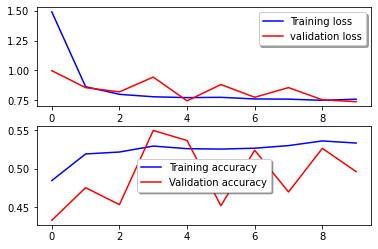

In [21]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history1.history['loss'], color='b', label="Training loss")
ax[0].plot(history1.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history1.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history1.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

**On full Dataset**

In [0]:
X = f.drop('Action', axis=1)
Y = f['Action']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(16540, 432)
(4136, 432)
(16540,)
(4136,)


In [60]:
model_1 = Sequential()
model_1.add(Dense(800, activation = "relu", input_shape = (432,)))
model_1.add(Dense(500, activation = "relu"))
model_1.add(Dense(200, activation = "relu"))
model_1.add(Dense(100, activation = "relu"))
model_1.add(Dense(5, activation = "softmax"))

# Define the optimizer and compile the model
optimizer = optimizers.SGD(lr=0.03, clipnorm=5.)
model_1.compile(optimizer= optimizer , loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

print (model_1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 800)               346400    
_________________________________________________________________
dense_56 (Dense)             (None, 500)               400500    
_________________________________________________________________
dense_57 (Dense)             (None, 200)               100200    
_________________________________________________________________
dense_58 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_59 (Dense)             (None, 5)                 505       
Total params: 867,705
Trainable params: 867,705
Non-trainable params: 0
_________________________________________________________________
None


In [61]:
#Model Fit
history = model_1.fit(X_train, Y_train, batch_size = 64, epochs = 5, 
          validation_data = (X_test, Y_test), verbose = 1)

Train on 16540 samples, validate on 4136 samples
Epoch 1/5
16540/16540 [==============================] - 6s 356us/step - loss: 11.6949 - acc: 0.2744 - val_loss: 11.6248 - val_acc: 0.2788
Epoch 2/5
16540/16540 [==============================] - 5s 305us/step - loss: 11.4902 - acc: 0.2871 - val_loss: 11.6248 - val_acc: 0.2788
Epoch 3/5
16540/16540 [==============================] - 5s 300us/step - loss: 11.4902 - acc: 0.2871 - val_loss: 11.6248 - val_acc: 0.2788
Epoch 4/5
16540/16540 [==============================] - 5s 303us/step - loss: 11.4902 - acc: 0.2871 - val_loss: 11.6248 - val_acc: 0.2788
Epoch 5/5
16540/16540 [==============================] - 5s 300us/step - loss: 11.4902 - acc: 0.2871 - val_loss: 11.6248 - val_acc: 0.2788


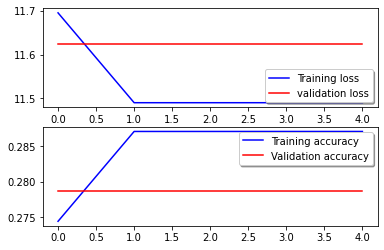

In [62]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

# Convolution Neural Networks

In [0]:
#Reshaping X
X1 = X.values.reshape(-1,16,27,1)

In [64]:
Y

0        4
1        4
2        4
3        4
4        4
        ..
20671    1
20672    1
20673    1
20674    1
20675    1
Name: Action, Length: 20676, dtype: int64

In [65]:
Y1 =to_categorical(Y)
Y1

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [66]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size= 0.15)

print(X1_train.shape)
print(X1_test.shape)
print(Y1_train.shape)
print(Y1_test.shape)

(17574, 16, 27, 1)
(3102, 16, 27, 1)
(17574, 5)
(3102, 5)


In [0]:
#datagen = ImageDataGenerator(
        #featurewise_center=False,  # set input mean to 0 over the dataset
        #samplewise_center=False,  # set each sample mean to 0
        #featurewise_std_normalization=False,  # divide inputs by std of the dataset
        #samplewise_std_normalization=False,  # divide each input by its std
        #zca_whitening=False,  # apply ZCA whitening
        #rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        #zoom_range = 0.1, # Randomly zoom image 
        #width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        #height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        #horizontal_flip=False,  # randomly flip images
        #vertical_flip=False)  # randomly flip images


#datagen.fit(X1)

**Model**

In [0]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (16,27,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization(momentum=.15))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization(momentum=0.15))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization(momentum=.15))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(5, activation = "softmax")) #Change the number [5] according to drimension of Y 

In [69]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 27, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 27, 32)        25632     
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 27, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 13, 32)         0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 13, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 13, 64)         18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 13, 64)         36928     
__________

In [0]:
optimizer= optimizers.Adam(lr=0.001,beta_1=0.9,beta_2=0.999)

In [0]:
model.compile(optimizer=optimizer,loss=['categorical_crossentropy'],metrics=['accuracy'])

In [0]:
epochs=8 #change this to 30 if you need to get better score
batch_size=65

In [97]:
history3 = model.fit(X1_train, Y1_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X1_test, Y1_test))

Train on 17574 samples, validate on 3102 samples
Epoch 1/8
17574/17574 [==============================] - 123s 7ms/step - loss: 0.4168 - acc: 0.7076 - val_loss: 0.3993 - val_acc: 0.7066
Epoch 2/8
17574/17574 [==============================] - 124s 7ms/step - loss: 0.4142 - acc: 0.7078 - val_loss: 0.4042 - val_acc: 0.7060
Epoch 3/8
17574/17574 [==============================] - 127s 7ms/step - loss: 0.4147 - acc: 0.7040 - val_loss: 0.3960 - val_acc: 0.7102
Epoch 4/8
17574/17574 [==============================] - 130s 7ms/step - loss: 0.4096 - acc: 0.7084 - val_loss: 0.3943 - val_acc: 0.7060
Epoch 5/8
17574/17574 [==============================] - 132s 8ms/step - loss: 0.4073 - acc: 0.7064 - val_loss: 0.4003 - val_acc: 0.7083
Epoch 6/8
17574/17574 [==============================] - 133s 8ms/step - loss: 0.4084 - acc: 0.7108 - val_loss: 0.3985 - val_acc: 0.7247
Epoch 7/8
17574/17574 [==============================] - 132s 8ms/step - loss: 0.4096 - acc: 0.7060 - val_loss: 0.3942 - val_acc:

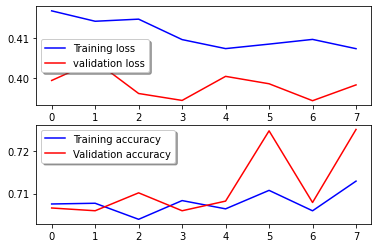

In [98]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history3.history['loss'], color='b', label="Training loss")
ax[0].plot(history3.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history3.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history3.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)